In [37]:
# Load avia.tsv into a pandas DataFrame
import pandas as pd

df = pd.read_csv('avia.tsv', sep='\t')
df.head()

,"freq,unit,victim,c_regis,geo\TIME_PERIOD",2019,2020,2021,2022,2023
0,"A,NR,KIL,EU27_2020,AT",0,0,0 p,1 p,0 p
1,"A,NR,KIL,EU27_2020,BE",0,0,0 p,0 p,0 p
2,"A,NR,KIL,EU27_2020,BG",0,0,0 p,0 p,0 p
3,"A,NR,KIL,EU27_2020,CH",0,0,0 p,0 p,0 p
4,"A,NR,KIL,EU27_2020,CY",0,0,0 p,0 p,0 p


In [38]:

# 1. Split the first column into separate columns and clean column names
split_cols = [c.replace('\\TIME_PERIOD', '').strip() for c in df.columns[0].split(',')]
first_col_split = df[df.columns[0]].str.split(',', expand=True)
first_col_split.columns = split_cols

# 2. Remove the original combined column and join new columns
avia = pd.concat([first_col_split, df.drop(df.columns[0], axis=1)], axis=1)


# 3. Remove ' p' suffix and convert year columns to numeric (handles spaces in column names)
for col in avia.columns:
    if col.strip().isdigit():
        avia[col] = avia[col].astype(str).str.replace(' p', '', regex=False)
        avia[col] = pd.to_numeric(avia[col], errors='coerce')

# 4. Handle missing or non-numeric values (already set to NaN by to_numeric)
avia

,freq,unit,victim,c_regis,geo,2019,2020,2021,2022,2023
0,A,NR,KIL,EU27_2020,AT,0,0.0,0.0,1.0,0.0
1,A,NR,KIL,EU27_2020,BE,0,0.0,0.0,0.0,0.0
2,A,NR,KIL,EU27_2020,BG,0,0.0,0.0,0.0,0.0
3,A,NR,KIL,EU27_2020,CH,0,0.0,0.0,0.0,0.0
4,A,NR,KIL,EU27_2020,CY,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
65,A,NR,KIL,EU28,RO,0,NaN,NaN,NaN,NaN
66,A,NR,KIL,EU28,SE,0,NaN,NaN,NaN,NaN
67,A,NR,KIL,EU28,SI,0,NaN,NaN,NaN,NaN
68,A,NR,KIL,EU28,SK,0,NaN,NaN,NaN,NaN


In [40]:
# 6. Remove rows where c_regis is 'EU28' and geo is 'EU27_2020' or 'EU28'
aviafilter = avia[(avia['c_regis'] != 'EU28') & (~avia['geo'].isin(['EU27_2020', 'EU28']))].reset_index(drop=True)
aviafilter

,freq,unit,victim,c_regis,geo,2019,2020,2021,2022,2023
0,A,NR,KIL,EU27_2020,AT,0,0.0,0.0,1.0,0.0
1,A,NR,KIL,EU27_2020,BE,0,0.0,0.0,0.0,0.0
2,A,NR,KIL,EU27_2020,BG,0,0.0,0.0,0.0,0.0
3,A,NR,KIL,EU27_2020,CH,0,0.0,0.0,0.0,0.0
4,A,NR,KIL,EU27_2020,CY,0,0.0,0.0,0.0,0.0
5,A,NR,KIL,EU27_2020,CZ,0,0.0,0.0,0.0,0.0
6,A,NR,KIL,EU27_2020,DE,0,0.0,0.0,0.0,0.0
7,A,NR,KIL,EU27_2020,DK,0,0.0,0.0,0.0,0.0
8,A,NR,KIL,EU27_2020,EE,0,0.0,0.0,0.0,0.0
9,A,NR,KIL,EU27_2020,EL,3,0.0,0.0,1.0,0.0


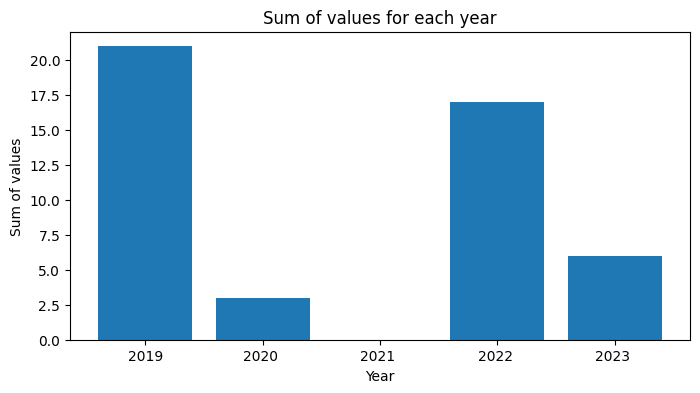

2019     21.0
2020      3.0
2021      0.0
2022     17.0
2023      6.0
dtype: float64

In [43]:
# 7. Sum the values for each year and plot a bar chart
import matplotlib.pyplot as plt

# Identify year columns
year_cols = [col for col in aviafilter.columns if col.strip().isdigit()]
year_sums = aviafilter[year_cols].sum()

plt.figure(figsize=(8,4))
plt.bar(year_sums.index, year_sums.values)
plt.xlabel('Year')
plt.ylabel('Sum of values')
plt.title('Sum of values for each year')
plt.show()
year_sums